## **Seguros medicos**
Regressão Linear com Deep Learning

### **Importação das bibliotecas e carregamento dos dados**

In [333]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

plt.style.use('dark_background')
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/diogomonteiro/insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### **Análise Exploratória Geral**

**Nessa parte vamos análisar:** 

1 - Análisar todas as variáveis para entender os dados.

2 - Análisar as quantidade linhas, colunas, tipos das colunas, dados nulos, quartis e etc...

Função para análisar as colunas

___________________________________________________________
age
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


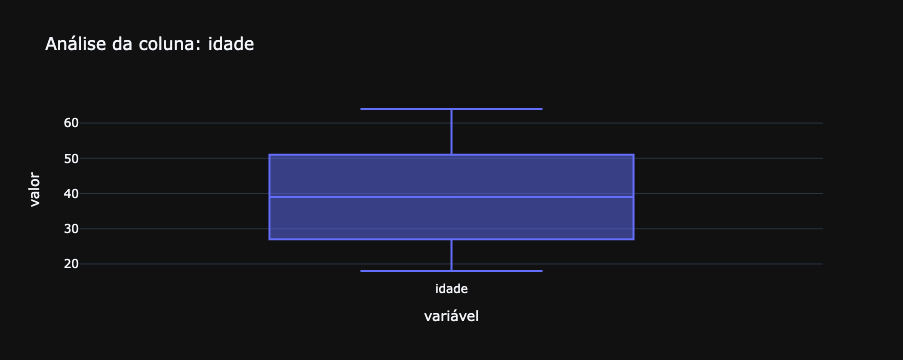

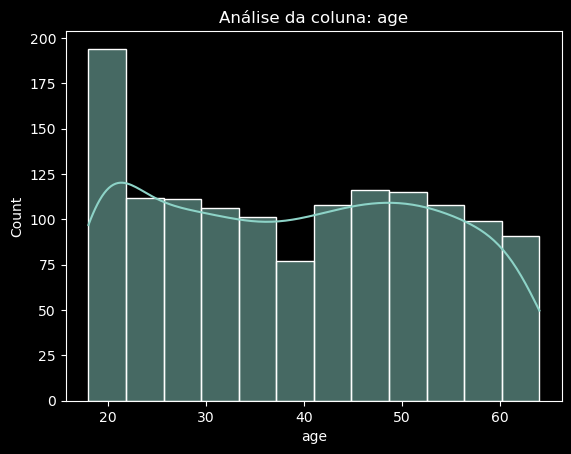

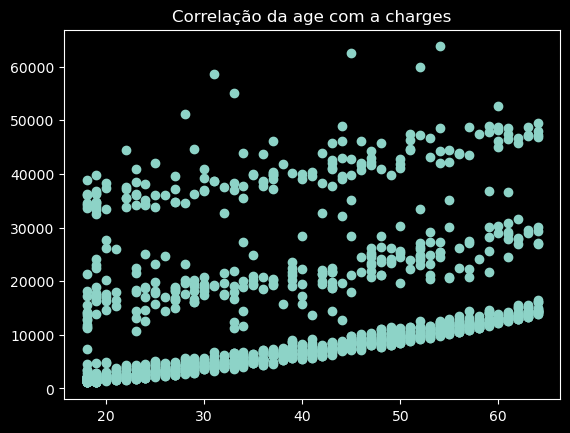

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 548
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


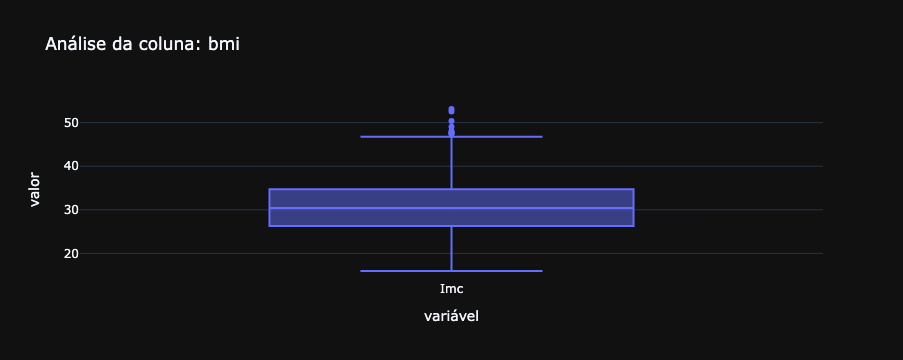

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


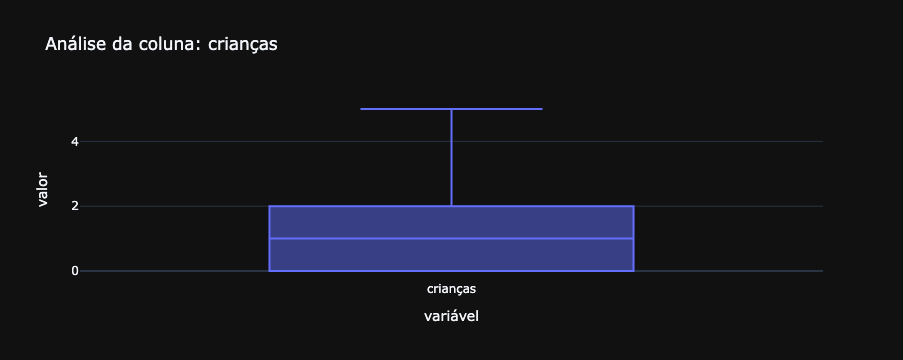

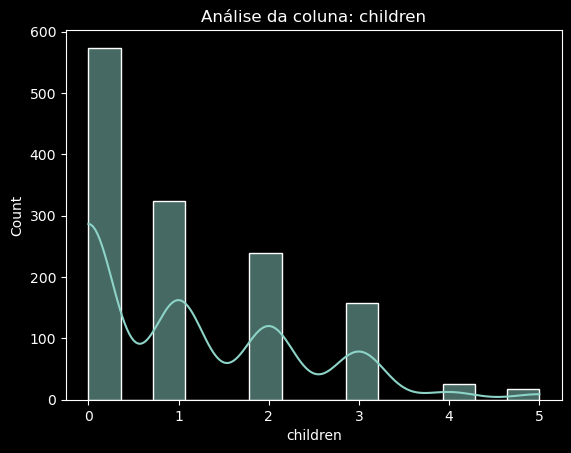

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


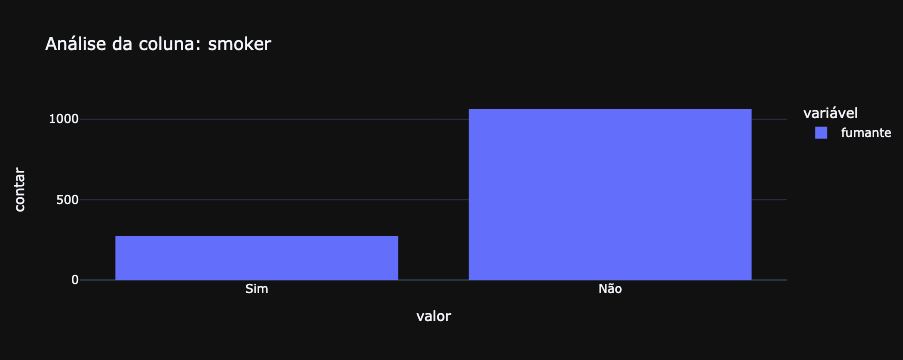

___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


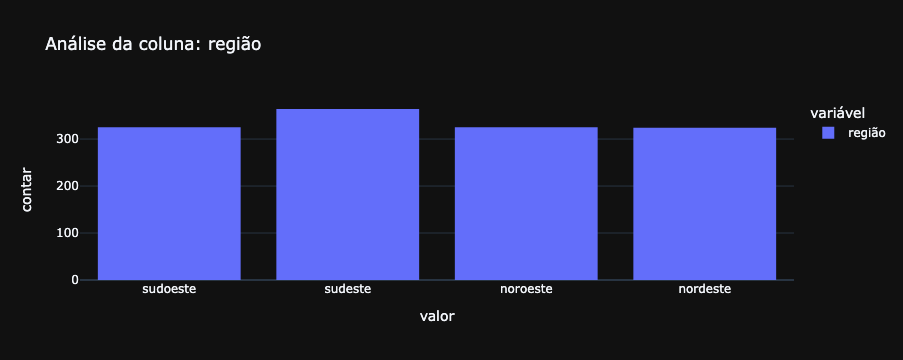

___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1337
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


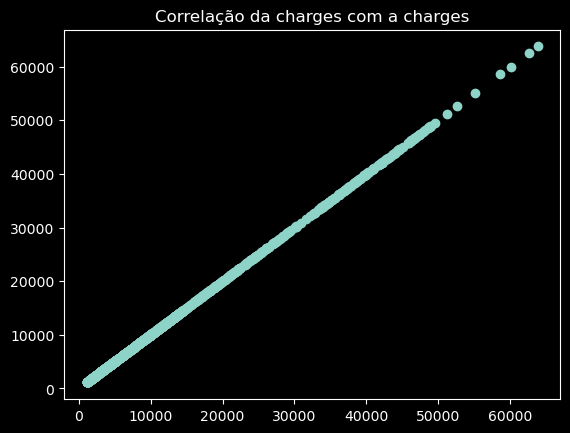

___________________________________________________________


In [387]:
def analise(df):
    
    for i in df.columns: 
        
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64': 

            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            print(f'Análsando os quartis: \n\n{df[i].describe()}')
            print(f'___________________________________________________________')
            fig = px.box(df[i], title=f"Análise da coluna: {df[i].name}",template= "plotly_dark")
            fig.show()
            print('')
            plt.title(f'Análise da coluna: {df[i].name}')
            sns.histplot(df[i], kde= 'charges')
            plt.show()             
            print(f'')
            plt.title(f'Correlação da {df[i].name} com a charges')
            plt.scatter(df[i], df.charges)
            plt.show()             
            print(f'___________________________________________________________')

        else:
            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            fig1 = px.histogram(df[i],title=f"Análise da coluna: {df[i].name}",template= 'plotly_dark')
            fig1.show()
            print(f'___________________________________________________________')

analise(df)   

### **Resposta:**

**Na análise geral observamos que:**

1 - tem outliers nas colunas BMI e no charges.

2 - vamos fazer algums análise nessas colunas, entender se bmi afeta o preço do seguro ou se e outra coluna.

----

**Análise das colunas bmi e charges**

In [259]:
imc_alto = df.loc[df['bmi'] >= 25]
imc_alto.loc[imc_alto['charges'] > 25000.00000]

age     sex     bmi  children smoker     region      charges
9      60  female  25.840         0     no  northwest  28923.13692
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[190 rows x 7 columns]

___________________________________________________________
age
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean       39.841720
std        14.075464
min        18.000000
25%        27.000000
50%        40.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 420
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean       32.559625
std         4.988743
min        25.000000
25%        28.595000
50%        31.900000
75%        35.815000
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean        1.088747
std         1.198439
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1092
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1093.000000
mean     13940.237872
std      12824.401478
min       1131.506600
25%       4889.999500
50%       9563.029000
75%      17560.379750
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


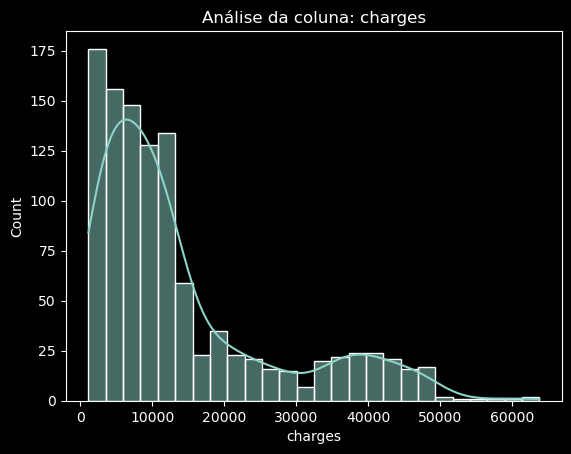

___________________________________________________________


In [260]:
analise(imc_alto)

In [261]:
imc_normal = df.loc[df['bmi'] <= 24.99]
imc_normal.loc[imc_normal['charges'] > 25000.00000]

age     sex     bmi  children smoker     region      charges
62     64    male  24.700         1     no  northwest  30166.61817
128    32  female  17.765         2    yes  northwest  32734.18630
140    34    male  22.420         2     no  northeast  27375.90478
219    24  female  23.210         0     no  southeast  25081.76784
607    59  female  23.655         0    yes  northwest  25678.77845
664    64  female  22.990         0    yes  southeast  27037.91410
688    47  female  24.100         1     no  southwest  26236.57997
917    45    male  22.895         0    yes  northeast  35069.37452
1142   52  female  24.860         0     no  southeast  27117.99378
1223   20  female  24.420         0    yes  southeast  26125.67477
1265   64    male  23.760         0    yes  southeast  26926.51440

___________________________________________________________
age
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean      36.375510
std       13.606811
min       18.000000
25%       24.000000
50%       35.000000
75%       47.000000
max       64.000000
Name: age, dtype: float64
___________________________________________________________


___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 128
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean      22.203898
std        2.103806
min       15.960000
25%       20.800000
50%       22.705000
75%       23.900000
max       24.985000
Name: bmi, dtype: float64
___________________________________________________________


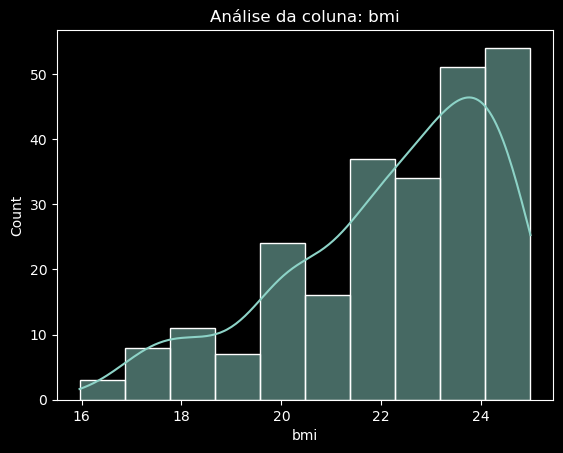

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean       1.122449
std        1.238598
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64
___________________________________________________________


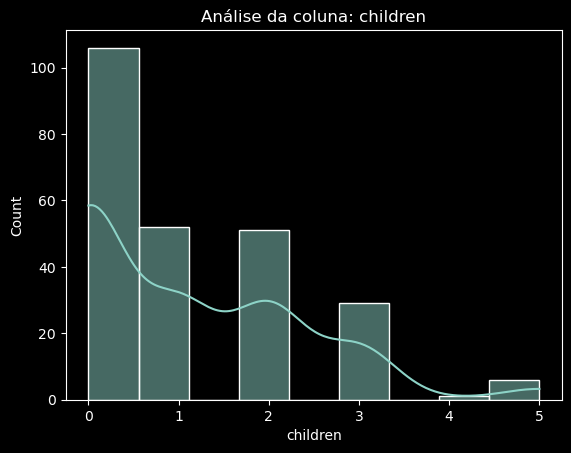

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 245
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count      245.000000
mean     10282.224474
std       7520.485850
min       1121.873900
25%       3861.209650
50%       8582.302300
75%      14571.890800
max      35069.374520
Name: charges, dtype: float64
___________________________________________________________


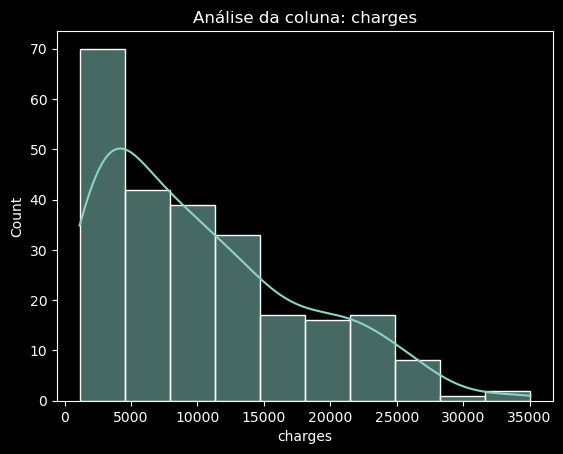

___________________________________________________________


In [262]:
analise(imc_normal)

In [263]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [264]:
correlação = df[['age', 'bmi', 'children', 'charges']]
round(correlação.corr(),2)

age   bmi  children  charges
age       1.00  0.11      0.04     0.30
bmi       0.11  1.00      0.01     0.20
children  0.04  0.01      1.00     0.07
charges   0.30  0.20      0.07     1.00

### **Resposta:**

**Conseguimos notar que:** 

1 - Temos alguns outliers nas colunas bmi e charges, a coluna bmi (imc) quando esta alta, afeta valor da variável Alvo deixando o valor mais caro.

2 - notamos que a variável smolker também afeta a variável alvo.

-------

### **Transformando os dados categóricos em numéricos** 

**Nesta parte vamos fazer:**

1 - Usar get_dummies para criar novas colunas das variáveis categóricas.

2 - Transformar as novas colunas em numéricas.

In [337]:
df1 = df
df1 = pd.get_dummies(df1, columns=['region'])
df1[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']] = df1[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']].astype('int64')
df1

age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400                 0   
1      18    male  33.770         1     no   1725.55230                 0   
2      28    male  33.000         3     no   4449.46200                 0   
3      33    male  22.705         0     no  21984.47061                 0   
4      32    male  28.880         0     no   3866.85520                 0   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830                 0   
1334   18  female  31.920         0     no   2205.98080                 1   
1335   18  female  36.850         0     no   1629.83350                 0   
1336   21  female  25.800         0     no   2007.94500                 0   
1337   61  female  29.070         0    yes  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 10 columns]

In [361]:
df1['sex'].replace({'male': 1,'female': 0},inplace=True)
df1['smoker'].replace({'yes': 1,'no':0}, inplace=True)
df1 = df1[['age', 'sex', 'bmi', 'children', 'smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest','charges']]
df1

age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19    0  27.900         0       1                 0                 0   
1      18    1  33.770         1       0                 0                 0   
2      28    1  33.000         3       0                 0                 0   
3      33    1  22.705         0       0                 0                 1   
4      32    1  28.880         0       0                 0                 1   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50    1  30.970         3       0                 0                 1   
1334   18    0  31.920         0       0                 1                 0   
1335   18    0  36.850         0       0                 0                 0   
1336   21    0  25.800         0       0                 0                 0   
1337   61    0  29.070         0       1                 0                 1   

      region_southeast  region_southwest      charges  
0                    0                 1  16884.92400  
1                    1                 0   1725.55230  
2                    1                 0   4449.46200  
3                    0                 0  21984.47061  
4                    0                 0   3866.85520  
...                ...               ...          ...  
1333                 0                 0  10600.54830  
1334                 0                 0   2205.98080  
1335                 1                 0   1629.83350  
1336                 0                 1   2007.94500  
1337                 0                 0  29141.36030  

[1338 rows x 10 columns]

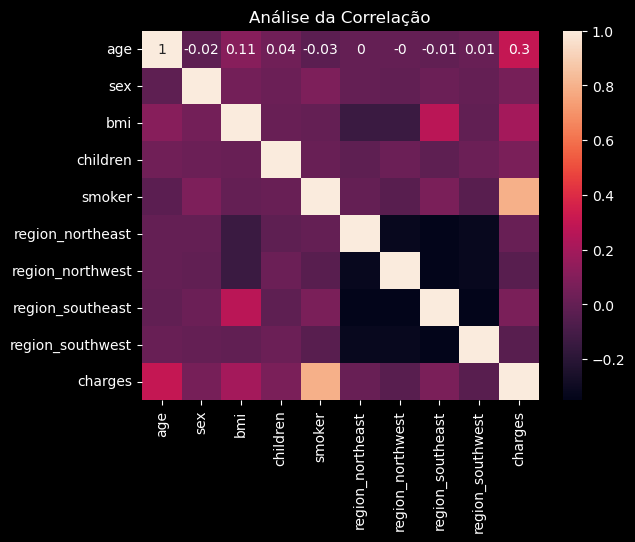

In [376]:
plt.title('Análise da Correlação')
sns.heatmap(round(df1.corr(),2),annot=True);

### **Resposta:**

Depois de transformar a coluna smoker (fumante) de categórica em numérica, vimos que ela tem uma forte correlação com variável alvo.

-----

### **Análise Estatística**

Nesta parte vamos fazer:

1 - 

2 - 

___________________________________________________________
age
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


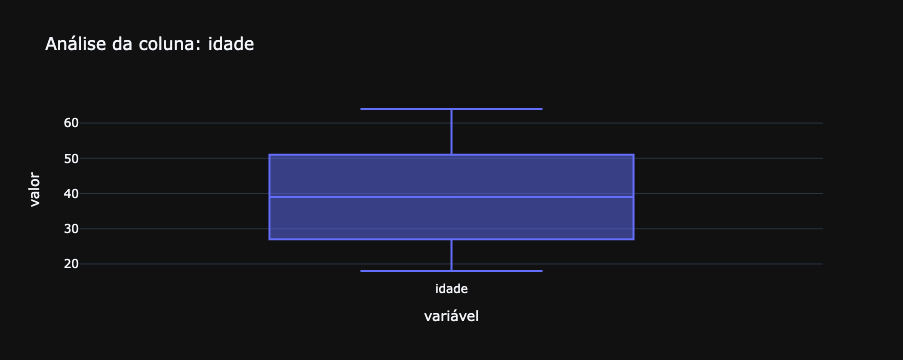

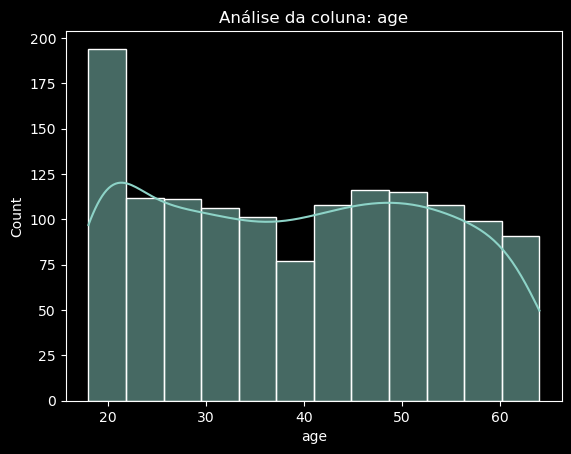

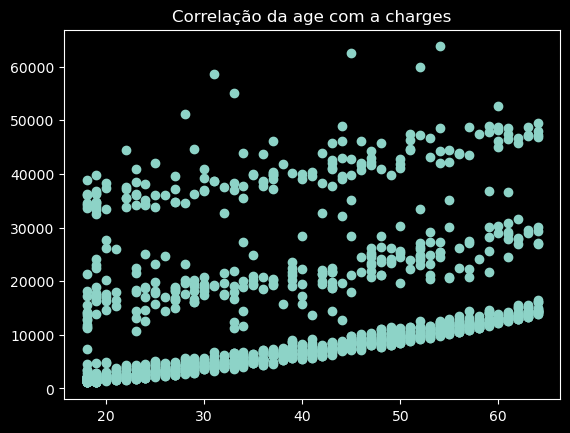

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.505232
std         0.500160
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
___________________________________________________________


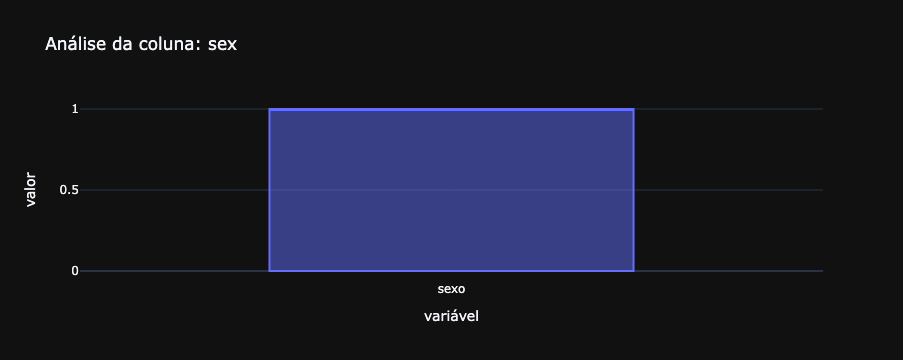

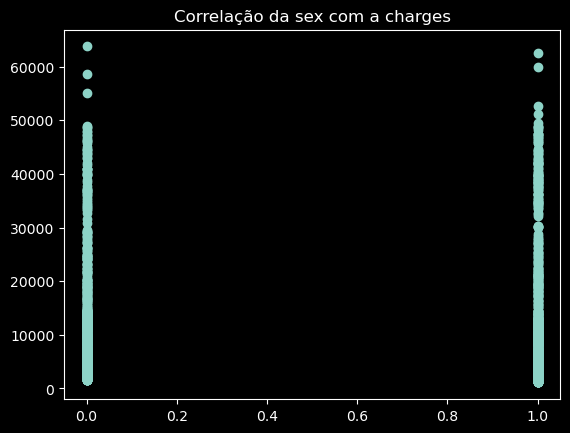

___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 548
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


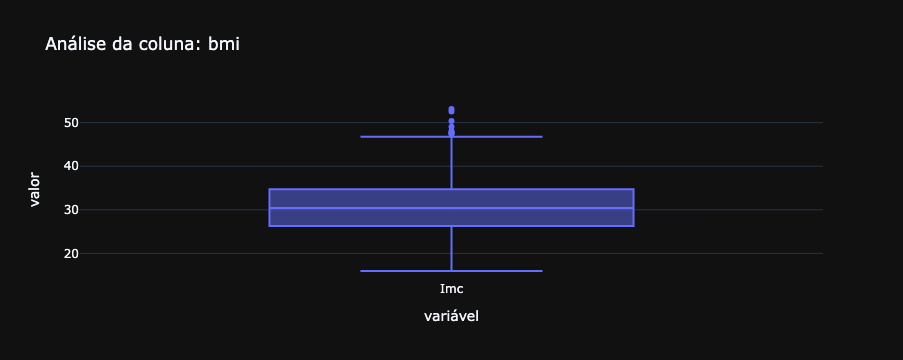

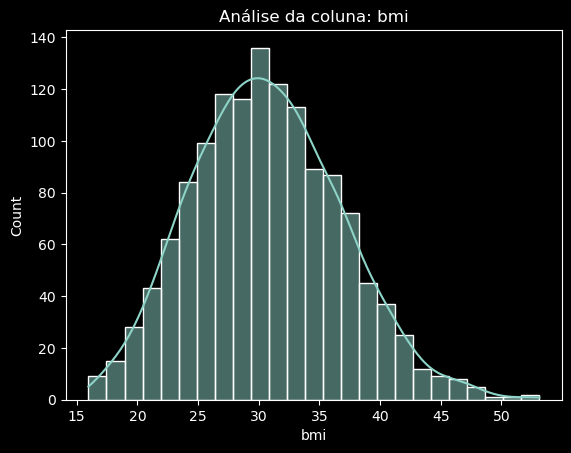

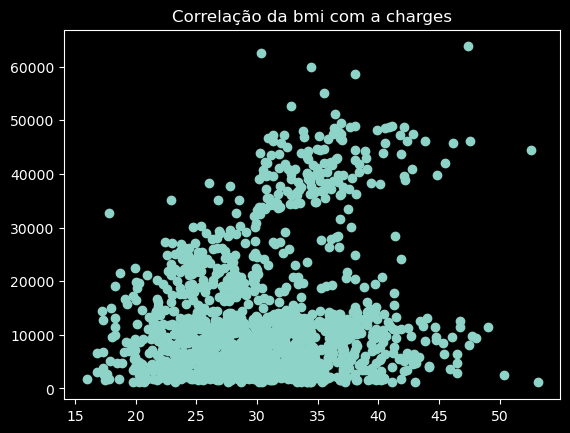

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


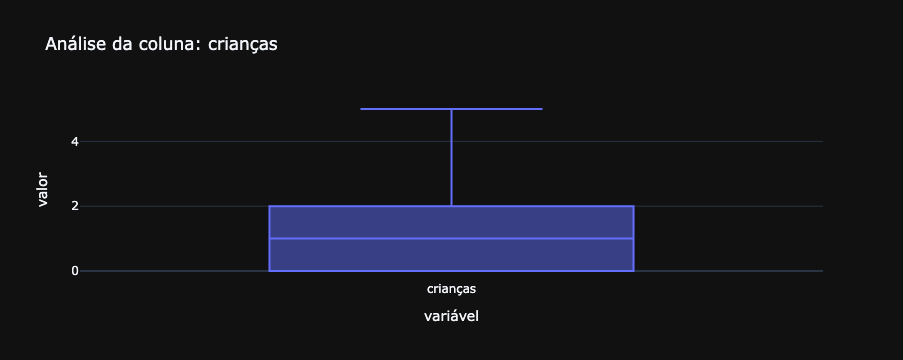

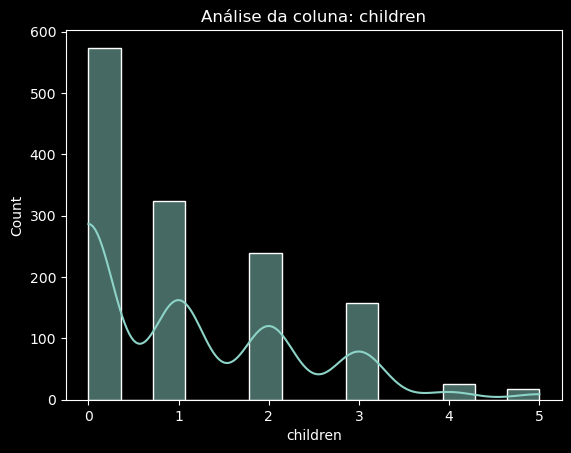

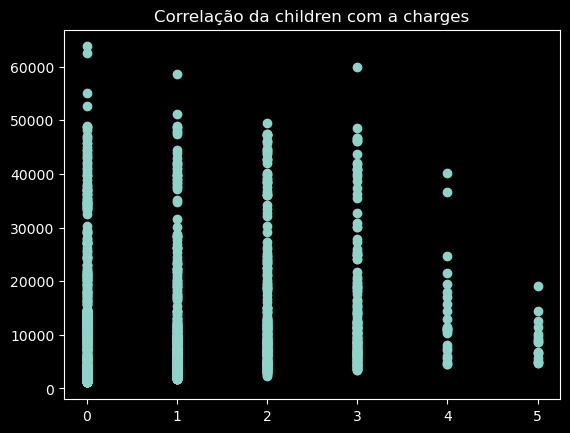

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64
___________________________________________________________


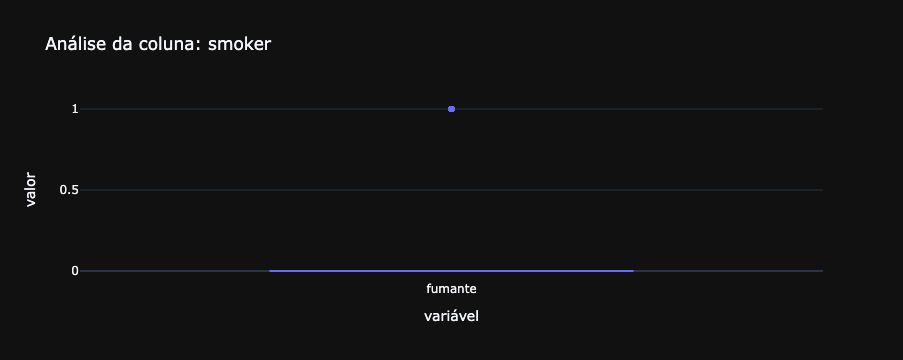

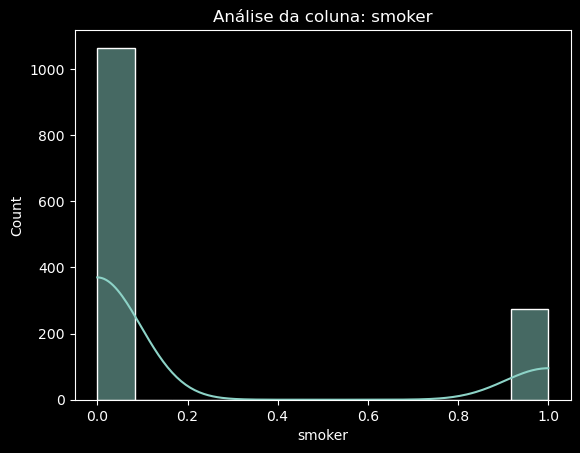

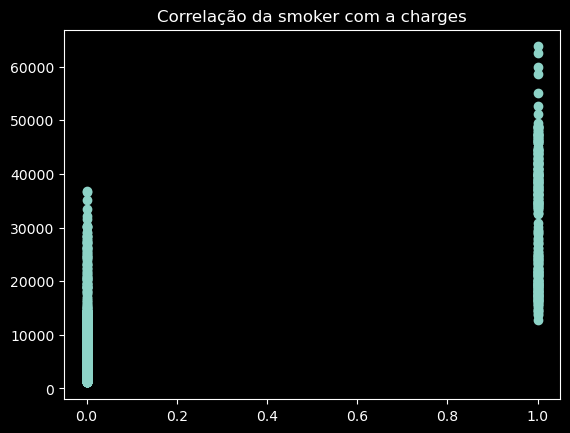

___________________________________________________________
___________________________________________________________
region_northeast
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242152
std         0.428546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_northeast, dtype: float64
___________________________________________________________


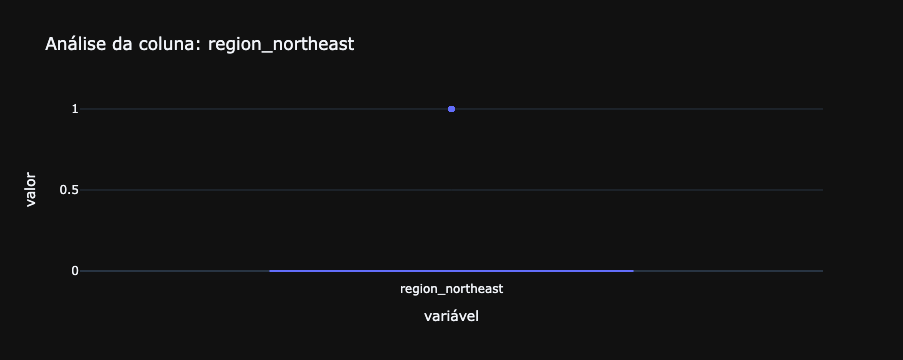

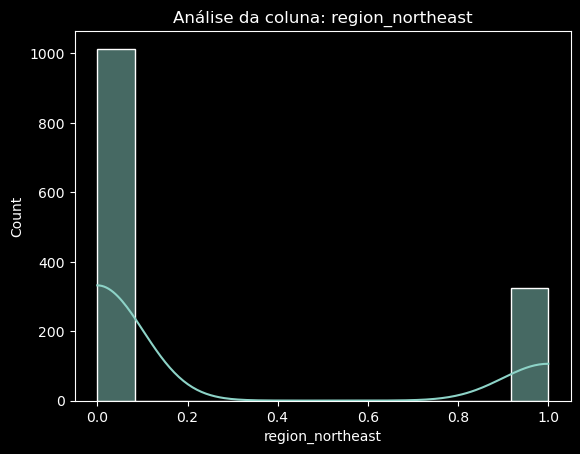

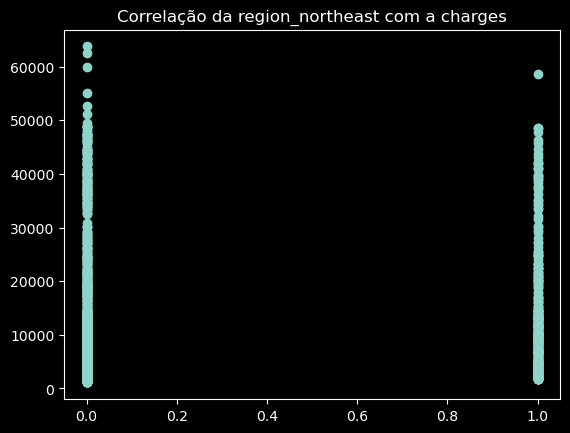

___________________________________________________________
___________________________________________________________
region_northwest
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242900
std         0.428995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_northwest, dtype: float64
___________________________________________________________


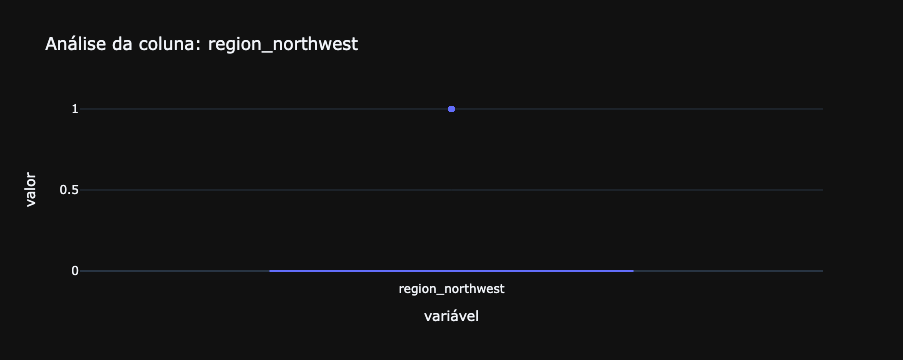

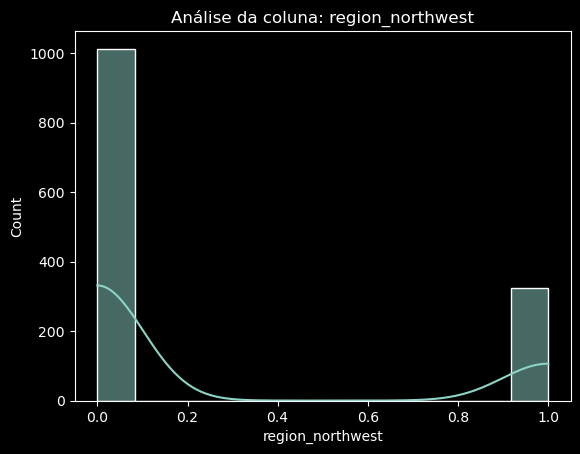

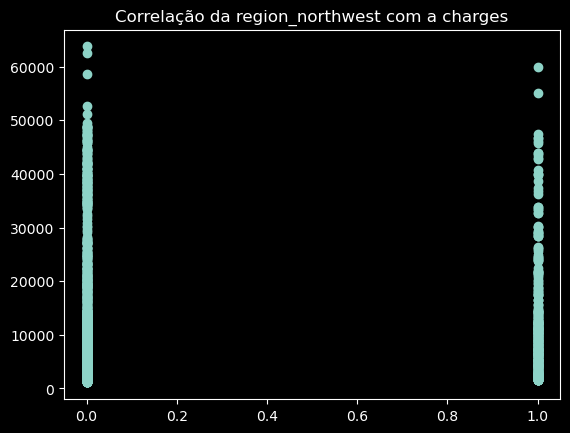

___________________________________________________________
___________________________________________________________
region_southeast
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.272048
std         0.445181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: region_southeast, dtype: float64
___________________________________________________________


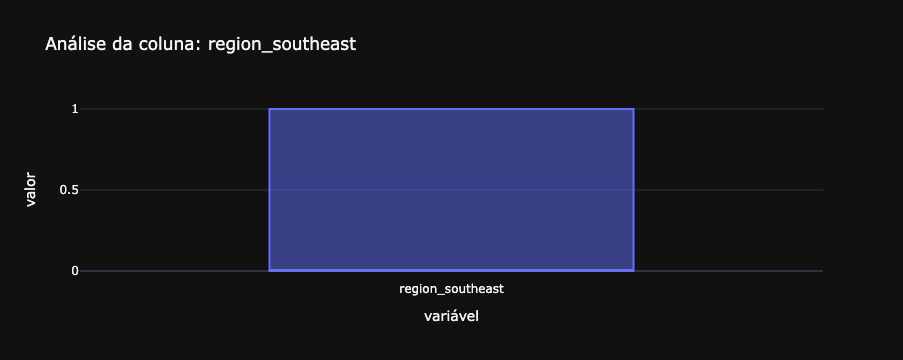

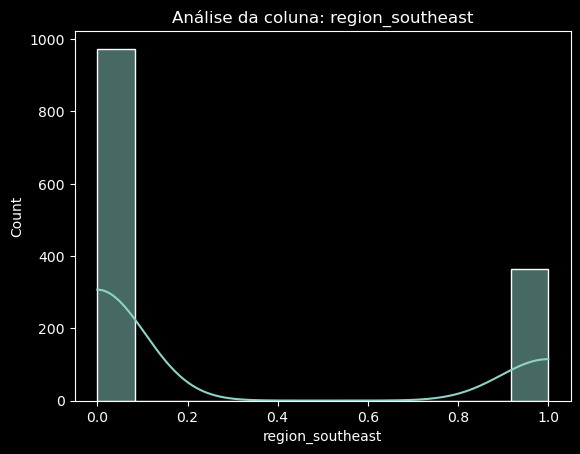

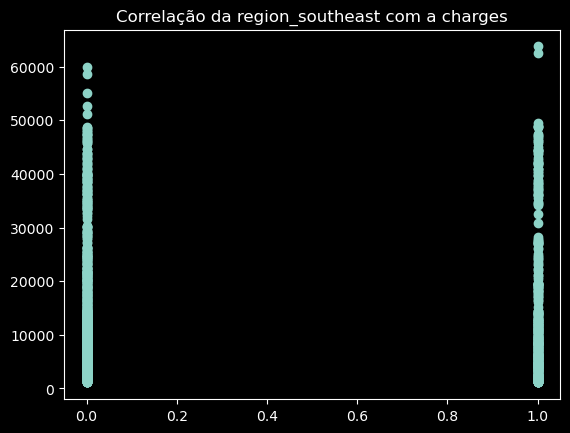

___________________________________________________________
___________________________________________________________
region_southwest
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242900
std         0.428995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_southwest, dtype: float64
___________________________________________________________


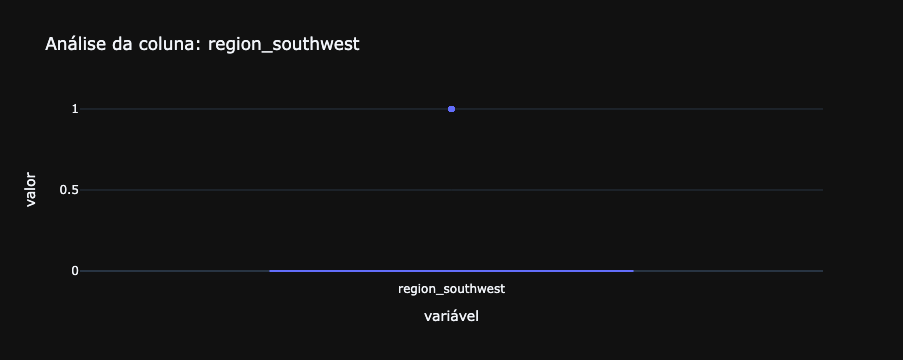

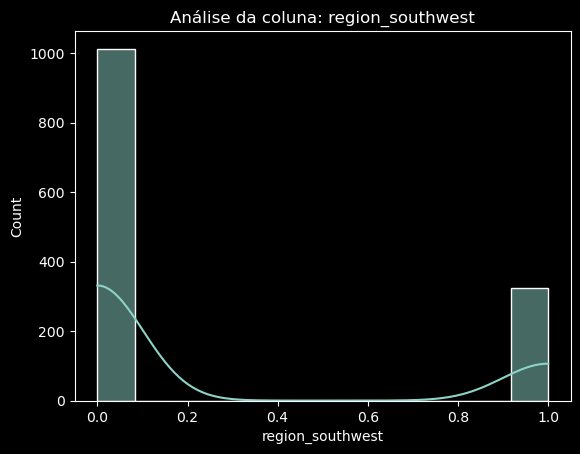

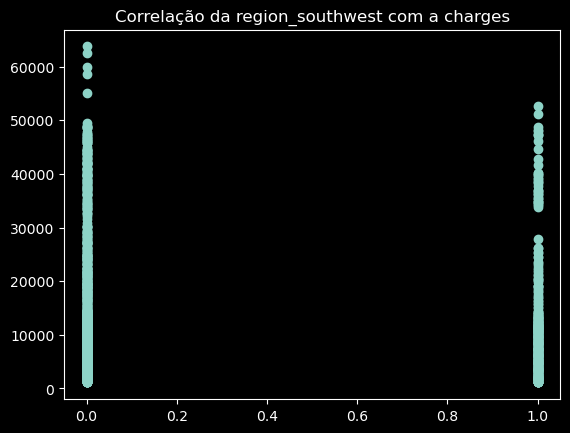

___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1337
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


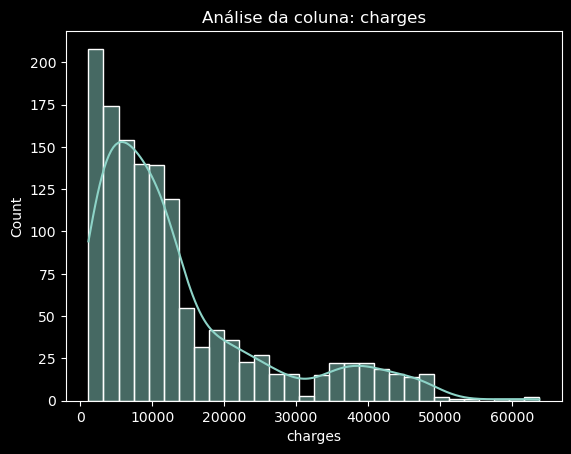

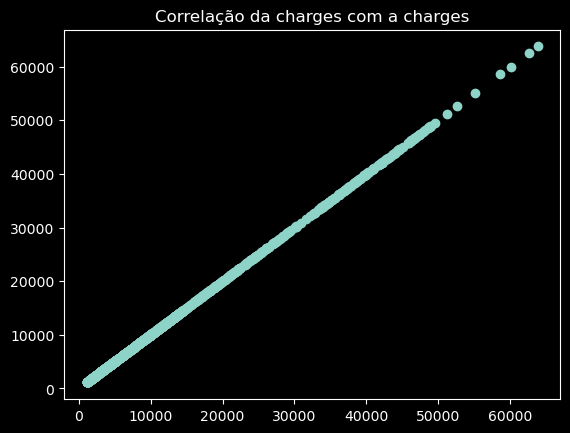

___________________________________________________________


In [390]:
analise(df1)

**Análise da Normalidade**

Gráficos QQ-plot

### **Separando os dados de treino e teste**

**Nesta parte vamos fazer:**

1 - importar a biblioteca sklearn para separar os dados de treino e teste.

2 - Usar Sklearn StandardScaler para fazer padronização.

### **Criando os modelos de redes neurais para Regressão Linear**

**Nesta parte vamos fazer:** 

1 - Criar uma classe para os modelos.

2 - treinar, testar e  fazer validação cruzada dos modelos.
 